# Chaper 2 - N-armed Bandits
### Deep Reinforcement Learning _in Action_

##### Listing 2.1

In [1]:
# 가장 value가 높은 액션을 구하기 
def get_best_action(actions):
	best_action = 0
	max_action_value = 0
	for i in range(len(actions)): #A 
		# get_action_value() 함수로 action 마다 비교 
		cur_action_value = get_action_value(actions[i]) #B
		if cur_action_value > max_action_value:
			best_action = i
			max_action_value = cur_action_value
	return best_action

##### Listing 2.2

In [4]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

n = 10  # 슬롯머신 팔의 수 
probs = np.random.rand(n) #A  각 팔과 연관된 확률
print("probs:", probs)
eps = 0.1  # 탐험할 확률 

probs: [0.29653091 0.05201163 0.34136635 0.10372897 0.78074323 0.94814189
 0.16257987 0.29703456 0.75912937 0.06543763]


##### Listing 2.3

In [3]:
def get_reward(prob, n=10):
    reward = 0;
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

In [9]:
reward_test = [get_reward(0.7) for _ in range(2000)]
print("reward_test:", reward_test)

reward_test: [7, 8, 5, 9, 10, 7, 7, 7, 7, 6, 9, 8, 9, 7, 8, 7, 9, 8, 6, 6, 7, 5, 8, 7, 7, 7, 6, 7, 7, 6, 5, 7, 5, 9, 7, 6, 8, 7, 7, 8, 9, 7, 8, 8, 7, 8, 7, 8, 9, 9, 10, 8, 7, 7, 8, 7, 7, 7, 6, 8, 4, 7, 8, 5, 8, 7, 7, 9, 9, 6, 8, 6, 8, 9, 6, 9, 6, 7, 6, 7, 9, 6, 6, 4, 5, 7, 7, 10, 6, 7, 8, 7, 7, 9, 8, 4, 7, 8, 9, 7, 6, 8, 9, 9, 9, 8, 10, 9, 6, 9, 8, 7, 7, 9, 6, 5, 9, 8, 8, 6, 6, 6, 4, 7, 5, 7, 7, 8, 9, 8, 7, 6, 7, 7, 7, 7, 8, 7, 9, 8, 6, 7, 7, 5, 7, 6, 8, 8, 10, 8, 7, 7, 8, 7, 7, 6, 7, 4, 9, 7, 8, 9, 6, 9, 7, 8, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 9, 9, 7, 7, 7, 8, 6, 8, 7, 5, 7, 6, 7, 7, 7, 6, 9, 7, 6, 6, 6, 9, 8, 7, 6, 6, 7, 6, 7, 5, 5, 6, 8, 3, 5, 7, 6, 7, 5, 8, 7, 8, 4, 8, 7, 6, 8, 7, 6, 9, 8, 10, 9, 8, 9, 8, 7, 6, 4, 5, 9, 8, 5, 7, 8, 6, 9, 6, 7, 6, 6, 6, 8, 6, 9, 8, 6, 8, 6, 7, 6, 7, 7, 9, 9, 6, 8, 9, 8, 5, 6, 7, 4, 9, 5, 8, 8, 8, 7, 9, 7, 4, 9, 7, 8, 7, 4, 9, 7, 8, 7, 8, 4, 6, 9, 6, 10, 7, 8, 5, 6, 5, 7, 8, 4, 7, 9, 7, 4, 7, 9, 6, 8, 8, 8, 7, 5, 9, 9, 8, 6, 8, 6, 4, 7, 7, 6, 7, 6, 7, 8

In [6]:
np.mean(reward_test)

6.994

In [7]:
sum = 0
x = [4,5,6,7]
for j in range(len(x)): 
	sum = sum + x[j]
sum

22

(array([  3.,  16.,  64., 228., 391., 550., 456., 226.,  66.]),
 array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
         6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ]),
 <BarContainer object of 9 artists>)

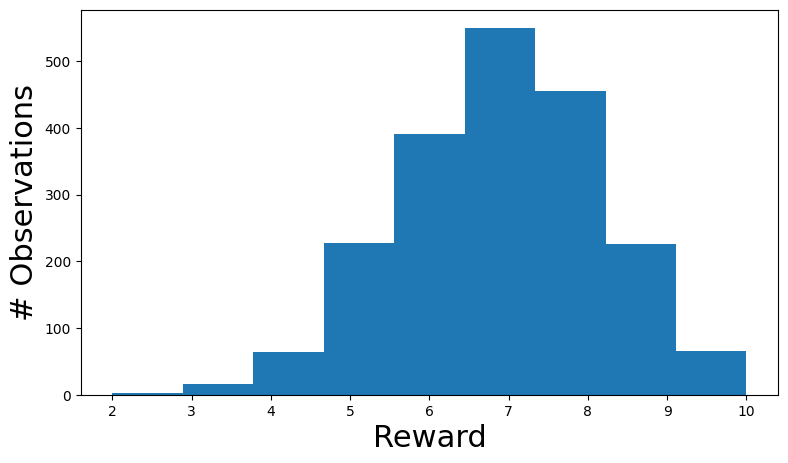

In [8]:
plt.figure(figsize=(9,5))
plt.xlabel("Reward",fontsize=22)
plt.ylabel("# Observations",fontsize=22)
plt.hist(reward_test,bins=9)

##### Listing 2.4

In [10]:
# 10 actions x 2 columns
# Columns: Count #, Avg Reward
record = np.zeros((n,2))
print(record)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [12]:
def get_best_arm(record):
    # 가장 큰 reward를 주는 arm을 선택 
    arm_index = np.argmax(record[:,1],axis=0)
    return arm_index

In [11]:
def update_record(record,action,r):
    # cnt * mean_reward = total_reward 이므로, 식을 이용해서 새로운 mean_reward를 업데이트
    new_r = (record[action,0] * record[action,1] + r) / (record[action,0] + 1)
    record[action,0] += 1
    record[action,1] = new_r
    return record

##### Listing 2.5

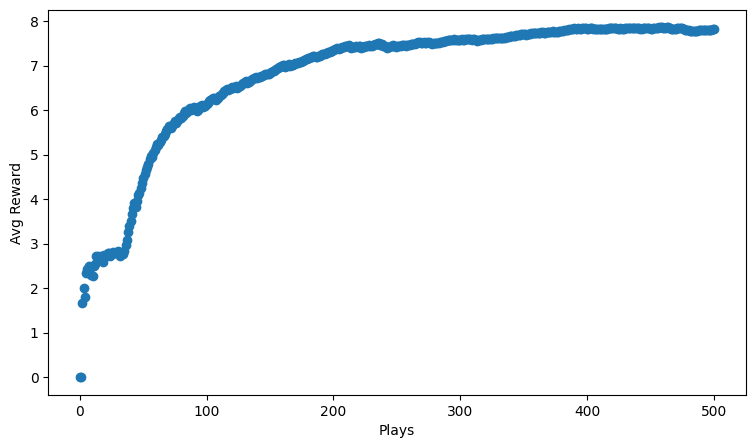

In [13]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(500):
    # 0.8의 확률로 greedy
    if random.random() > 0.2:
        choice = get_best_arm(record)
    # 0.2의 확률로 탐험 
    else:
        choice = np.random.randint(10)
    
    # action으로 얻은 새로운 reward를 이용해서 업데이트 
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)

##### Listing 2.6

In [14]:
# tau: temperature, 클수록 확률들이 비슷해진다. 
def softmax(av, tau=1.12):
    softm = ( np.exp(av / tau) / np.sum( np.exp(av / tau) ) )
    return softm

In [15]:
probs = np.random.rand(n)
record = np.zeros((n,2))

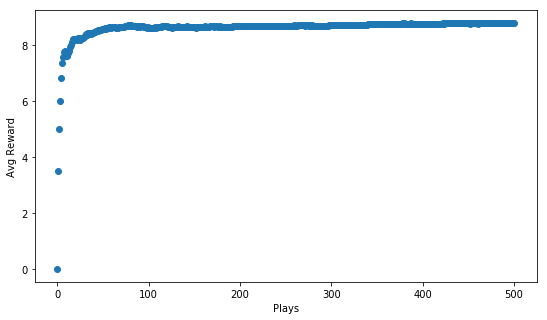

In [193]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(500):
    # 주어진 action value를 이용해서 softmax 함수를 갱신 
    p = softmax(record[:,1],tau=0.7)
    # 확률 분포에 따라서 action을 정한다.
    choice = np.random.choice(np.arange(n),p=p)
    
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)

##### Listing 2.9

In [17]:
class ContextBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.init_distribution(arms)
        self.update_state()
    
        
    def init_distribution(self, arms):
        # Num states = Num Arms to keep things simple
        self.bandit_matrix = np.random.rand(arms,arms)
        #each row represents a state, each column an arm
        
    def reward(self, prob):
        reward = 0
        for i in range(self.arms):
            if random.random() < prob:
                reward += 1
        return reward
        
    def get_state(self):
        return self.state

 
    def update_state(self):
        self.state = np.random.randint(0,self.arms)
        
    def get_reward(self,arm):
        return self.reward(self.bandit_matrix[self.get_state()][arm])
        
    def choose_arm(self, arm):
        reward = self.get_reward(arm)
        self.update_state()
        return reward

In [18]:
import numpy as np
import torch

arms = 10
N, D_in, H, D_out = 1, arms, 100, arms

In [22]:
env = ContextBandit(arms=10)
state = env.get_state()
reward = env.choose_arm(1)
print(state)

3


In [23]:
print(env.bandit_matrix)
print(env.get_state())

[[0.14782249 0.80294078 0.18165399 0.8370778  0.3841247  0.52012827
  0.47937979 0.6135016  0.06188844 0.04083542]
 [0.203594   0.44309212 0.86380097 0.97923932 0.60869017 0.55514241
  0.40107757 0.88990805 0.25010104 0.50244966]
 [0.07793314 0.60849805 0.91370354 0.42327356 0.42862475 0.22507142
  0.20238035 0.73924073 0.07302722 0.41439585]
 [0.6294054  0.17130059 0.07146028 0.43035993 0.05856569 0.4696678
  0.95879861 0.30060096 0.76306742 0.727118  ]
 [0.53852893 0.28309388 0.95241797 0.18475525 0.33439572 0.19739486
  0.26106165 0.37236072 0.37299332 0.39282079]
 [0.07009866 0.00490516 0.88103398 0.69916262 0.25230675 0.17238097
  0.46995845 0.5686981  0.56200397 0.89746537]
 [0.61672122 0.45448447 0.72983023 0.72335133 0.40080272 0.94098942
  0.90351905 0.39492678 0.29533973 0.79421558]
 [0.71012227 0.98813517 0.96936652 0.22900304 0.84620874 0.20574468
  0.81157559 0.07637595 0.25091398 0.82931697]
 [0.59329315 0.38705014 0.64563853 0.34281049 0.23073837 0.04282118
  0.77194025 

In [24]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.ReLU(),
)

In [25]:
loss_fn = torch.nn.MSELoss()

In [26]:
env = ContextBandit(arms)

In [27]:
def one_hot(N, pos, val=1):
    one_hot_vec = np.zeros(N)
    one_hot_vec[pos] = val
    return one_hot_vec

In [38]:
def running_mean(x,N=50):
    c = x.shape[0] - N
    y = np.zeros(c)
    conv = np.ones(N)
    for i in range(c):
        # numpy는 @로 matrix multiplication을 수행함 
        # y[i] = np.sum(x[i:i+N])/N # 아래식은 사실 이 코드와 같음
        y[i] = (x[i:i+N] @ conv)/N
        #print("x:",x[i:i+N])
        #print("conv:",conv)
        #print("y:",y[i])
    return y

In [31]:
def train(env, epochs=5000, learning_rate=1e-2):
    # 현재 state를 one-hot encoding으로 가져옴 
    cur_state = torch.Tensor(one_hot(arms,env.get_state())) #A
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    rewards = []
    for i in range(epochs):
        y_pred = model(cur_state) #B
        av_softmax = softmax(y_pred.data.numpy(), tau=2.0) #C
        av_softmax /= av_softmax.sum() #D
        choice = np.random.choice(arms, p=av_softmax) #E
        cur_reward = env.choose_arm(choice) #F
        one_hot_reward = y_pred.data.numpy().copy() #G
        one_hot_reward[choice] = cur_reward #H
        reward = torch.Tensor(one_hot_reward)
        rewards.append(cur_reward)
        loss = loss_fn(y_pred, reward)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cur_state = torch.Tensor(one_hot(arms,env.get_state())) #I
    return np.array(rewards)

In [32]:
rewards = train(env)

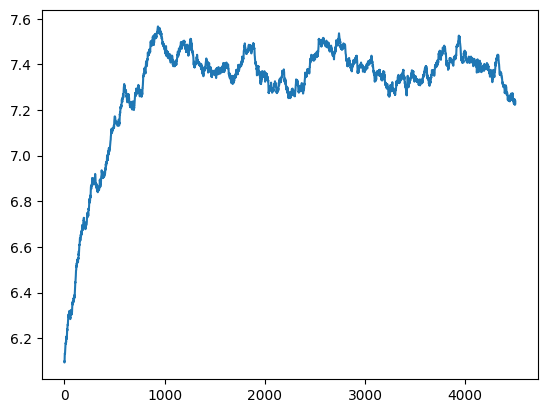

In [39]:
plt.plot(running_mean(rewards,N=500))